Implementación de Algoritmo de Aprendizaje En Secuencia:  
-  Implemente el algoritmo de aprendizaje secuencial del perceptrón y corra el mismo 
por 100 épocas. Inicializando los pesos de forma aleatoria para los tres datasets. 
En todos los casos enfóquese en medir el accuracy (es decir, el número de aciertos 
de clasificación versus el número total de eventos).  
-  Para los tres datasets recopile el accuracy por época y genere gráficos (eje equis 
el número de época y en el eje ye el valor de accuracy para esa época).  
-  Para todos los datasets dibuje el decision boundary (es decir, el hiperplano que 
divide los datos entre categoría +1 y -1. 

In [993]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt

# Perceptron Linear

In [994]:
# Sigmoid function activation function
sigmoid = lambda x: 1 / (1 + np.exp(-x))

# Perceptron class
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session

        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights[1:] += self.learning_rate * error * prediction * (1 - prediction) * inputs
                self.weights[0] += self.learning_rate * error * prediction * (1 - prediction)

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(1/accuracy))


# Plot the decision boundary
def plot_decision_boundary(perceptron, training_inputs, labels):
    if perceptron.weights is None:
        print("Perceptron has not been trained.")
        return

    plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels, cmap=plt.cm.Spectral)

    # Plot the decision boundary
    x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
    y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.round(np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')
    plt.show()


# Data Set 1 - Linearly Separable

In [995]:
x = pd.read_csv('./XY/x.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,2.822737,4.154048
1,0.741074,0.032447
2,4.794975,0.404499
3,1.672767,3.685057
4,3.571626,1.126299
...,...,...
195,3.035141,4.776586
196,4.343927,1.170200
197,3.656601,2.025832
198,4.031428,3.240811


In [996]:
y = pd.read_csv('./XY/y.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y

,Class
0,1
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


### Plot X

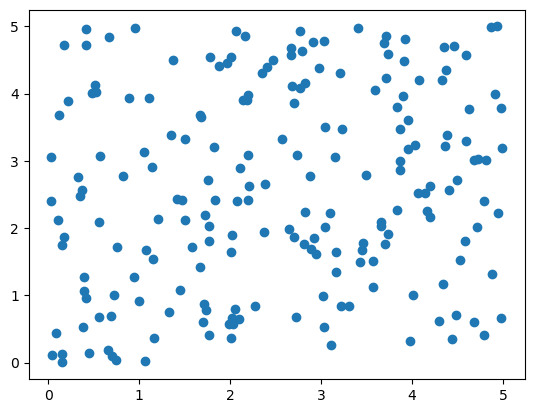

In [997]:
plt.scatter(x['X'], x['Y'])

### Perceptron Secuencial Data Set 1

In [998]:
# run the perceptron class for 100 epochs, learning rate of 0.01, and random weights
perceptron = Perceptron(epochs=1000, learning_rate=0.01, weights=np.random.rand(3))
# data set to numpy array
training_inputs = x.to_numpy()
labels = y.to_numpy()
# train the perceptron
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 0.010230179028132993
Epoch: 1 Accuracy: 0.009925558312655087
Epoch: 2 Accuracy: 0.009950248756218905
Epoch: 3 Accuracy: 0.009876543209876543
Epoch: 4 Accuracy: 0.009876543209876543
Epoch: 5 Accuracy: 0.009876543209876543
Epoch: 6 Accuracy: 0.009852216748768473
Epoch: 7 Accuracy: 0.009876543209876543
Epoch: 8 Accuracy: 0.009900990099009901
Epoch: 9 Accuracy: 0.009876543209876543
Epoch: 10 Accuracy: 0.009900990099009901
Epoch: 11 Accuracy: 0.009876543209876543
Epoch: 12 Accuracy: 0.009876543209876543
Epoch: 13 Accuracy: 0.009852216748768473
Epoch: 14 Accuracy: 0.009828009828009828
Epoch: 15 Accuracy: 0.009828009828009828
Epoch: 16 Accuracy: 0.009828009828009828
Epoch: 17 Accuracy: 0.009828009828009828
Epoch: 18 Accuracy: 0.009828009828009828
Epoch: 19 Accuracy: 0.009828009828009828
Epoch: 20 Accuracy: 0.00980392156862745
Epoch: 21 Accuracy: 0.00980392156862745
Epoch: 22 Accuracy: 0.00980392156862745
Epoch: 23 Accuracy: 0.00980392156862745
Epoch: 24 Accuracy: 0.00977995

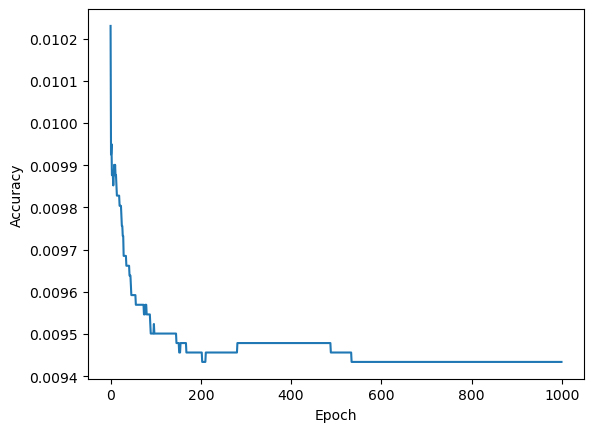

In [999]:
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

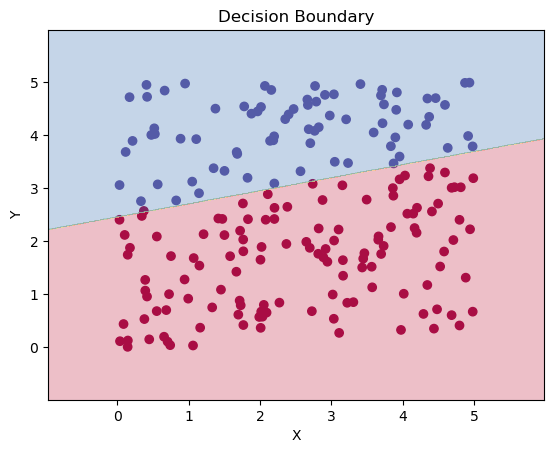

In [1000]:
plot_decision_boundary(perceptron, training_inputs, labels)

# Perceptron XOR

In [1001]:
class Perceptron:
    def __init__(self, input_size, weights=None):
        self.weights = weights
        self.bias = np.random.rand()
        self.accuracies = []

    def activate(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activate(weighted_sum)
        return output

    def train(self, training_inputs, labels, epochs, learning_rate):
        for epoch in range(epochs):
            correct_predictions = 0  # Init counter for correct predictions
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += learning_rate * error * inputs
                self.bias += learning_rate * error

                # Increment correct predictions counter if the prediction is correct
                if prediction == label:
                    correct_predictions += 1

            # Calculate accuracy for the current epoch
            accuracy = correct_predictions / len(labels)
            self.accuracies.append(1/accuracy)
            print(f'Época {epoch + 1}/{epochs}, Precisión: {accuracy}')




def plot_decision_boundary(model, X, y):
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([model.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)





## Data Set 3 - XOR

In [1002]:
x = pd.read_csv('./XOR/XXOR.csv', header=None)
x.columns = ['X', 'Y']

x


,X,Y
0,0.141117,0.078580
1,-0.005747,-0.039122
2,0.094092,0.040520
3,0.049805,-0.002619
4,-0.168823,-0.011247
...,...,...
95,0.935282,1.047225
96,1.093041,0.982468
97,0.857808,1.199796
98,0.914345,0.845841


In [1003]:
y = pd.read_csv('./XOR/YXOR.csv', header=None)
y.columns = ['Class']

y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


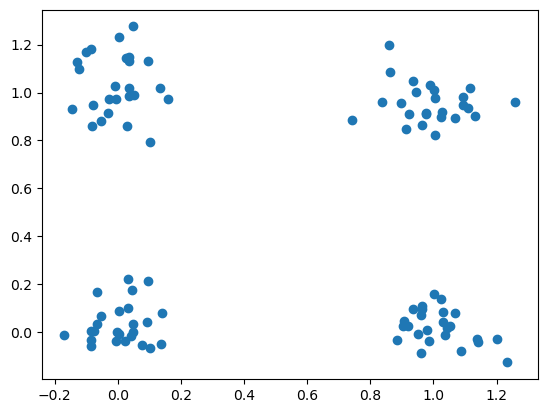

In [1004]:
plt.scatter(x['X'], x['Y'])

In [1005]:
# Transform to numpy array
training_inputs = np.array(x)
labels = np.array(y)

# Creamos un perceptrón con 2 entradas
perceptron = Perceptron(input_size=2, weights=np.random.rand(2))

# Entrenamos el perceptrón con los datos de entrenamiento
perceptron.train(training_inputs, labels, epochs=100, learning_rate=0.01)

Época 1/100, Precisión: 0.56
Época 2/100, Precisión: 0.59
Época 3/100, Precisión: 0.62
Época 4/100, Precisión: 0.68
Época 5/100, Precisión: 0.77
Época 6/100, Precisión: 0.82
Época 7/100, Precisión: 0.85
Época 8/100, Precisión: 0.88
Época 9/100, Precisión: 0.9
Época 10/100, Precisión: 0.93
Época 11/100, Precisión: 0.94
Época 12/100, Precisión: 0.95
Época 13/100, Precisión: 0.96
Época 14/100, Precisión: 0.97
Época 15/100, Precisión: 0.96
Época 16/100, Precisión: 0.96
Época 17/100, Precisión: 0.94
Época 18/100, Precisión: 0.94
Época 19/100, Precisión: 0.95
Época 20/100, Precisión: 0.95
Época 21/100, Precisión: 0.96
Época 22/100, Precisión: 0.96
Época 23/100, Precisión: 0.96
Época 24/100, Precisión: 0.95
Época 25/100, Precisión: 0.95
Época 26/100, Precisión: 0.96
Época 27/100, Precisión: 0.96
Época 28/100, Precisión: 0.96
Época 29/100, Precisión: 0.96
Época 30/100, Precisión: 0.96
Época 31/100, Precisión: 0.94
Época 32/100, Precisión: 0.95
Época 33/100, Precisión: 0.93
Época 34/100, Precis

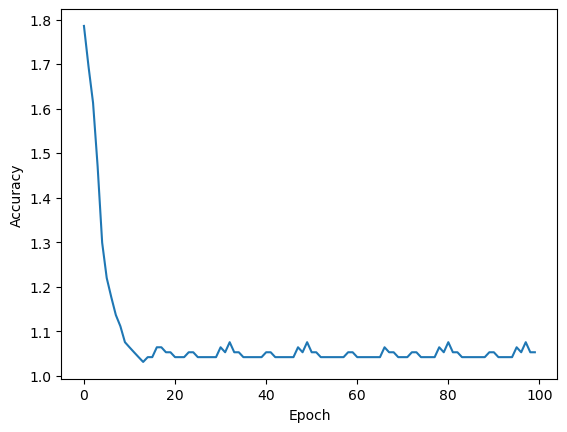

In [1006]:
# Plot the accuracies
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


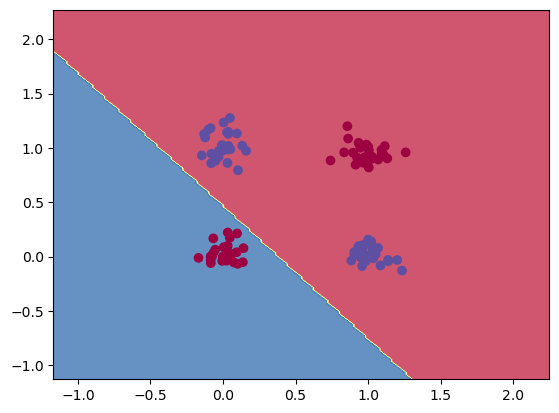

In [1007]:
plot_decision_boundary(perceptron, training_inputs, labels)

# Perceptron Non Linear

In [1008]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class Perceptron:
    def __init__(self,learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * prediction * (1 - prediction) * inputs

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1/accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(1/accuracy))

def plot_decision_boundary(perceptron, x, y, poly):
    # Definir la malla de puntos
    x_min, x_max = x['X'].min(), x['X'].max()
    y_min, y_max = x['Y'].min(), x['Y'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Preparar datos de la malla y transformarlos a polinomial
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid_data)

    # Calcular las predicciones en la malla
    Z = perceptron.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)

    # Graficar los puntos de datos
    scatter = plt.scatter(x['X'], x['Y'], c=y['Class'], s=20, edgecolor='k', cmap=plt.cm.Spectral)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Decision Boundary')
    plt.show()


# Data set 2 - Non-linearly separable data set

In [1009]:
x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,0.064775,0.074421
1,0.325578,0.497319
2,0.081736,1.159518
3,0.053192,-0.022444
4,0.504479,0.387099
...,...,...
395,-0.308411,-2.315298
396,-2.690173,1.099032
397,-1.195448,2.093523
398,2.614705,1.642373


In [1010]:
y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y

,Class
0,1
1,1
2,1
3,1
4,1
...,...
395,-1
396,-1
397,-1
398,-1


### Plot X NOT LINEARLY SEPARABLE

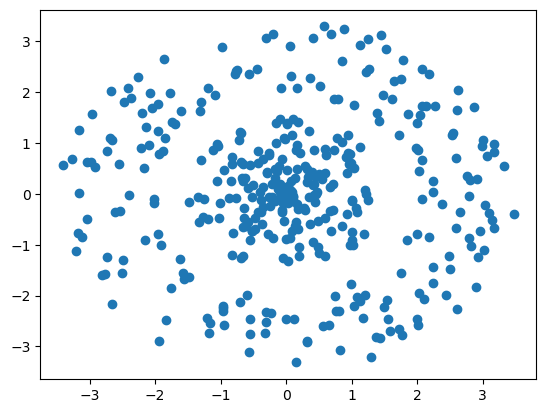

In [1011]:
plt.scatter(x['X'], x['Y'])

### Perceptron Secuencial Data Set 2

In [1012]:
# Transform the training inputs into a polynomial feature set
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)
labels = y.values
# Initialize the perceptron with the new input size
perceptron = Perceptron(epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 0.015873015873015872
Epoch: 1 Accuracy: 0.017391304347826087
Epoch: 2 Accuracy: 0.016129032258064516
Epoch: 3 Accuracy: 0.014925373134328358
Epoch: 4 Accuracy: 0.014084507042253521
Epoch: 5 Accuracy: 0.013333333333333334
Epoch: 6 Accuracy: 0.012578616352201259
Epoch: 7 Accuracy: 0.0125
Epoch: 8 Accuracy: 0.012269938650306749
Epoch: 9 Accuracy: 0.011976047904191617
Epoch: 10 Accuracy: 0.011904761904761904
Epoch: 11 Accuracy: 0.011764705882352941
Epoch: 12 Accuracy: 0.011560693641618497
Epoch: 13 Accuracy: 0.011428571428571429
Epoch: 14 Accuracy: 0.011299435028248588
Epoch: 15 Accuracy: 0.011111111111111112
Epoch: 16 Accuracy: 0.011049723756906077
Epoch: 17 Accuracy: 0.011049723756906077
Epoch: 18 Accuracy: 0.01092896174863388
Epoch: 19 Accuracy: 0.010869565217391304
Epoch: 20 Accuracy: 0.010869565217391304
Epoch: 21 Accuracy: 0.0106951871657754
Epoch: 22 Accuracy: 0.010582010582010581
Epoch: 23 Accuracy: 0.010526315789473684
Epoch: 24 Accuracy: 0.010471204188481676
Ep

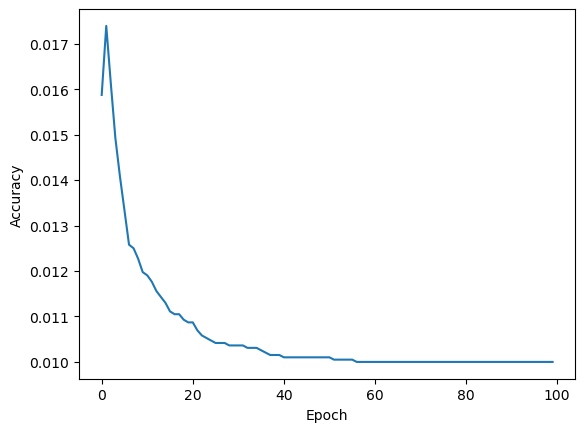

In [1013]:
# Graficar el rendimiento (accuracy) a lo largo de las épocas
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

/Users/juancisneros/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


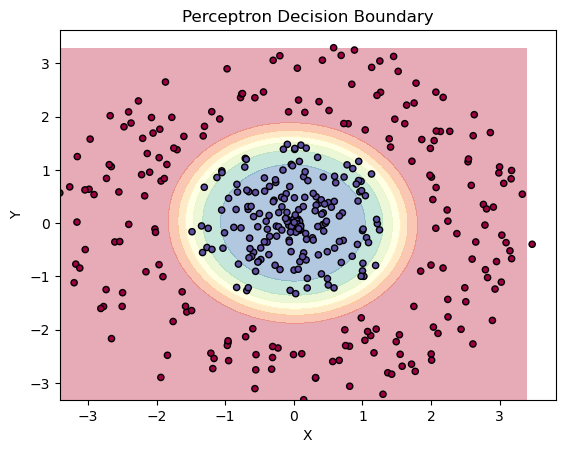

In [1014]:
plot_decision_boundary(perceptron, x, y, poly)

# Implementación de Algoritmo de Aprendizaje En Batch:  
-  Implemente el algoritmo de aprendizaje batch del perceptrón y corra el mismo por 
100 épocas. Inicializando los pesos de forma aleatoria para los tres datasets. En 
todos los casos enfóquese en medir el accuracy.  
-  Para los tres datasets recopile el accuracy por época y genere gráficos de accuracy 
versus época.  
-  Para todos los datasets dibuje el decision boundary (es decir, el hiperplano que 
divide los datos entre categoría +1 y -1.

# Perceptron Linear Batch

In [1015]:
class PerceptronBatch:
    def __init__(self, input_size, learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights if weights is not None else np.random.rand(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = [] 

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.sigmoid(summation)

    def calculate_accuracy(self, predictions, labels):
        thresholded_predictions = (predictions >= 0.5).astype(int)
        correct_predictions = np.sum(thresholded_predictions == labels)
        total_predictions = len(labels)
        accuracy = correct_predictions / total_predictions
        return accuracy

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            
            predictions = self.predict(training_inputs)
            errors = labels - predictions
            self.weights[1:] += self.learning_rate * np.dot(errors * predictions * (1 - predictions), training_inputs)
            self.weights[0] += self.learning_rate * np.sum(errors * predictions * (1 - predictions))

            accuracy = self.calculate_accuracy(predictions, labels)
            self.accuracies.append(1/accuracy)

            print(f'Epoch {epoch + 1}/{self.epochs}, Accuracy: {accuracy}')

def plot_decision_boundary(perceptron, training_inputs, labels):
    if perceptron.weights is None:
        print("Perceptron has not been trained.")
        return

    plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels, cmap=plt.cm.Spectral)

    # Plot the decision boundary
    x_min, x_max = training_inputs[:, 0].min() - 1, training_inputs[:, 0].max() + 1
    y_min, y_max = training_inputs[:, 1].min() - 1, training_inputs[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = np.round(np.array([perceptron.predict(np.array([x, y])) for x, y in np.c_[xx.ravel(), yy.ravel()]]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Decision Boundary')
    plt.show()

# Data Set 1 - Linearly Separable

In [1016]:
x = pd.read_csv('./XY/x.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,2.822737,4.154048
1,0.741074,0.032447
2,4.794975,0.404499
3,1.672767,3.685057
4,3.571626,1.126299
...,...,...
195,3.035141,4.776586
196,4.343927,1.170200
197,3.656601,2.025832
198,4.031428,3.240811


In [1017]:
y = pd.read_csv('./XY/y.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y


,Class
0,1
1,0
2,0
3,1
4,0
...,...
195,1
196,0
197,0
198,0


### Plot the data

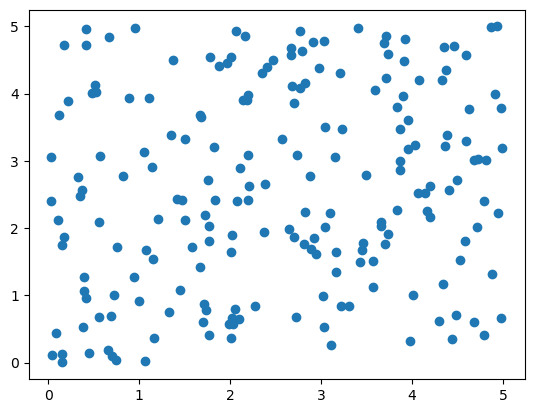

In [1018]:
plt.scatter(x['X'], x['Y'])

In [1019]:
x = x.to_numpy()
labels = y.to_numpy().flatten()

perceptron = PerceptronBatch(input_size=2, epochs=100, learning_rate=0.01, weights=np.random.rand(3))
perceptron.train(x, labels)

Epoch 1/100, Accuracy: 0.375
Epoch 2/100, Accuracy: 0.56
Epoch 3/100, Accuracy: 0.61
Epoch 4/100, Accuracy: 0.67
Epoch 5/100, Accuracy: 0.675
Epoch 6/100, Accuracy: 0.695
Epoch 7/100, Accuracy: 0.695
Epoch 8/100, Accuracy: 0.725
Epoch 9/100, Accuracy: 0.72
Epoch 10/100, Accuracy: 0.735
Epoch 11/100, Accuracy: 0.735
Epoch 12/100, Accuracy: 0.75
Epoch 13/100, Accuracy: 0.755
Epoch 14/100, Accuracy: 0.765
Epoch 15/100, Accuracy: 0.77
Epoch 16/100, Accuracy: 0.785
Epoch 17/100, Accuracy: 0.795
Epoch 18/100, Accuracy: 0.8
Epoch 19/100, Accuracy: 0.8
Epoch 20/100, Accuracy: 0.81
Epoch 21/100, Accuracy: 0.815
Epoch 22/100, Accuracy: 0.825
Epoch 23/100, Accuracy: 0.84
Epoch 24/100, Accuracy: 0.84
Epoch 25/100, Accuracy: 0.845
Epoch 26/100, Accuracy: 0.845
Epoch 27/100, Accuracy: 0.85
Epoch 28/100, Accuracy: 0.85
Epoch 29/100, Accuracy: 0.85
Epoch 30/100, Accuracy: 0.85
Epoch 31/100, Accuracy: 0.855
Epoch 32/100, Accuracy: 0.875
Epoch 33/100, Accuracy: 0.875
Epoch 34/100, Accuracy: 0.875
Epoch 

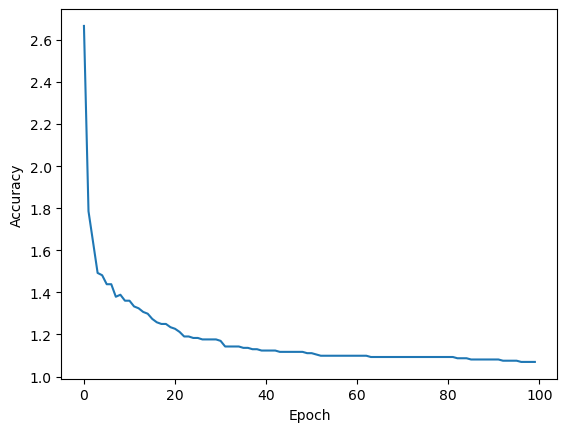

In [1020]:
# Plot the accuracies
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


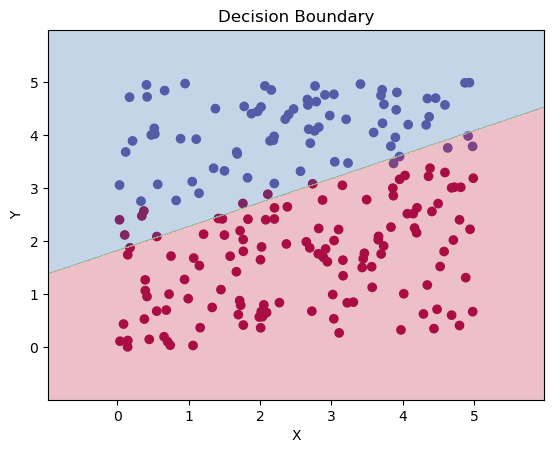

In [1021]:
# Plot the decision boundary
plot_decision_boundary(perceptron, x, labels)

# Perceptron XOR Batch

In [1022]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, weights=None):
        self.weights = weights
        self.bias = np.random.rand()
        self.accuracies = []

    def activate(self, x):
        return 1 if x > 0 else 0

    def predict(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        output = self.activate(weighted_sum)
        return output

    def train(self, training_inputs, labels, epochs, learning_rate):
        for epoch in range(epochs):
            correct_predictions = 0  # Init counter for correct predictions

            # Initialize gradients
            grad_weights = np.zeros_like(self.weights)
            grad_bias = 0

            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction

                # Accumulate gradients
                grad_weights += error * inputs
                grad_bias += error

                # Increment correct predictions counter if the prediction is correct
                if prediction == label:
                    correct_predictions += 1

            # Update weights and bias after processing the entire dataset
            self.weights += learning_rate * grad_weights
            self.bias += learning_rate * grad_bias

            # Calculate accuracy for the current epoch
            accuracy = correct_predictions / len(labels)
            self.accuracies.append(1 / accuracy)
            print(f'Epoch {epoch + 1}/{epochs}, Accuracy: {accuracy}')





def plot_decision_boundary(model, X, y):
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([model.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)





In [1023]:
x = pd.read_csv('./XOR/XXOR.csv', header=None)
x.columns = ['X', 'Y']

x

,X,Y
0,0.141117,0.078580
1,-0.005747,-0.039122
2,0.094092,0.040520
3,0.049805,-0.002619
4,-0.168823,-0.011247
...,...,...
95,0.935282,1.047225
96,1.093041,0.982468
97,0.857808,1.199796
98,0.914345,0.845841


In [1024]:
y = pd.read_csv('./XOR/YXOR.csv', header=None)
y.columns = ['Class']

y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
95,0.0
96,0.0
97,0.0
98,0.0


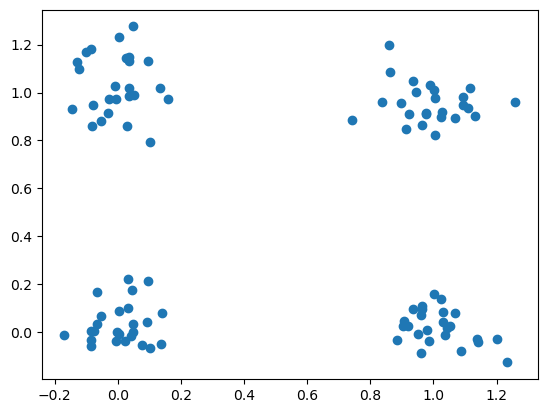

In [1025]:
# Plot the data
plt.scatter(x['X'], x['Y'])

In [1026]:
# Transform to numpy array
training_inputs = np.array(x)
labels = np.array(y)

# Perceptron with 2 inputs
perceptron = Perceptron(input_size=2, weights=np.random.rand(2))

# Train the perceptron with the training data
perceptron.train(training_inputs, labels, epochs=100, learning_rate=0.01)


Epoch 1/100, Accuracy: 0.51
Epoch 2/100, Accuracy: 0.5
Epoch 3/100, Accuracy: 0.68
Epoch 4/100, Accuracy: 0.5
Epoch 5/100, Accuracy: 0.26
Epoch 6/100, Accuracy: 0.5
Epoch 7/100, Accuracy: 0.5
Epoch 8/100, Accuracy: 0.5
Epoch 9/100, Accuracy: 0.5
Epoch 10/100, Accuracy: 0.5
Epoch 11/100, Accuracy: 0.5
Epoch 12/100, Accuracy: 0.5
Epoch 13/100, Accuracy: 0.5
Epoch 14/100, Accuracy: 0.5
Epoch 15/100, Accuracy: 0.5
Epoch 16/100, Accuracy: 0.5
Epoch 17/100, Accuracy: 0.5
Epoch 18/100, Accuracy: 0.5
Epoch 19/100, Accuracy: 0.5
Epoch 20/100, Accuracy: 0.5
Epoch 21/100, Accuracy: 0.5
Epoch 22/100, Accuracy: 0.5
Epoch 23/100, Accuracy: 0.5
Epoch 24/100, Accuracy: 0.5
Epoch 25/100, Accuracy: 0.5
Epoch 26/100, Accuracy: 0.5
Epoch 27/100, Accuracy: 0.5
Epoch 28/100, Accuracy: 0.5
Epoch 29/100, Accuracy: 0.5
Epoch 30/100, Accuracy: 0.5
Epoch 31/100, Accuracy: 0.5
Epoch 32/100, Accuracy: 0.5
Epoch 33/100, Accuracy: 0.5
Epoch 34/100, Accuracy: 0.5
Epoch 35/100, Accuracy: 0.5
Epoch 36/100, Accuracy: 0.

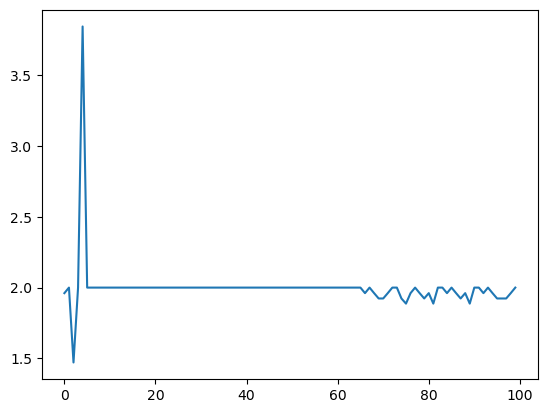

In [1027]:
# Plot the accuracies
plt.plot(perceptron.accuracies)

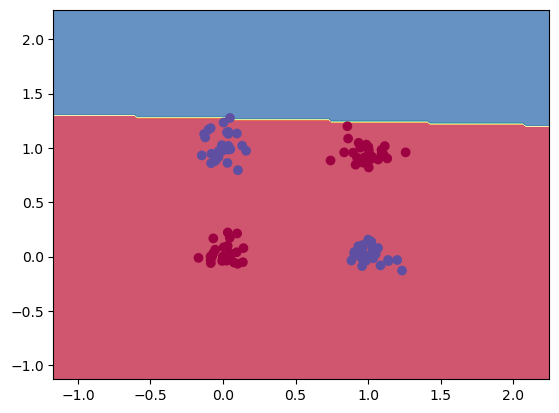

In [1028]:
# Plot the decision boundary
plot_decision_boundary(perceptron, training_inputs, labels)

# Perceptron No Lineal Batch

In [1029]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class PerceptronBatch:
    def __init__(self,learning_rate=0.01, epochs=100, weights=None):
        self.weights = weights
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.accuracies = []  # List to store accuracies for each epoch

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights)
        return sigmoid(summation)

    def calculate_accuracy(self, training_inputs, labels):
        predictions = [round(self.predict(inputs)) for inputs in training_inputs]
        correct_predictions = np.sum(predictions == labels)
        accuracy = correct_predictions / len(labels)
        return accuracy

    def train(self, training_inputs, labels):
        self.accuracies = []  # Reset accuracies for each training session
        for epoch in range(self.epochs):
            # Initialize weight updates to zero for each epoch
            weight_updates = np.zeros_like(self.weights)

            # Iterate through all training examples to calculate updates
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                weight_updates += error * prediction * (1 - prediction) * inputs

            # Update weights after processing the entire dataset for the epoch
            self.weights += self.learning_rate * weight_updates

            # Calculate accuracy for the current epoch
            accuracy = self.calculate_accuracy(training_inputs, labels)
            self.accuracies.append(1 / accuracy)

            # Print accuracy for the current epoch
            print("Epoch: " + str(epoch) + " Accuracy: " + str(1/accuracy))

def plot_decision_boundary(perceptron, x, y, poly):
    # Definir la malla de puntos
    x_min, x_max = x['X'].min(), x['X'].max()
    y_min, y_max = x['Y'].min(), x['Y'].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Preparar datos de la malla y transformarlos a polinomial
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    grid_poly = poly.transform(grid_data)

    # Calcular las predicciones en la malla
    Z = perceptron.predict(grid_poly)
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Spectral)

    # Graficar los puntos de datos
    scatter = plt.scatter(x['X'], x['Y'], c=y['Class'], s=20, edgecolor='k', cmap=plt.cm.Spectral)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron Decision Boundary')
    plt.show()


In [1030]:
x = pd.read_csv('./NoLinear/Xnonlinear.csv', header=None)
x = x.drop(x.columns[0], axis=1)
#header column 0 is X and column 1 is Y
x.columns = ['X', 'Y']

x

,X,Y
0,0.064775,0.074421
1,0.325578,0.497319
2,0.081736,1.159518
3,0.053192,-0.022444
4,0.504479,0.387099
...,...,...
395,-0.308411,-2.315298
396,-2.690173,1.099032
397,-1.195448,2.093523
398,2.614705,1.642373


In [1031]:
y = pd.read_csv('./NoLinear/ynonlinear.csv', header=None)
y = y.drop(y.columns[0], axis=1)
# header column 0 is Class
y.columns = ['Class']

y


,Class
0,1
1,1
2,1
3,1
4,1
...,...
395,-1
396,-1
397,-1
398,-1


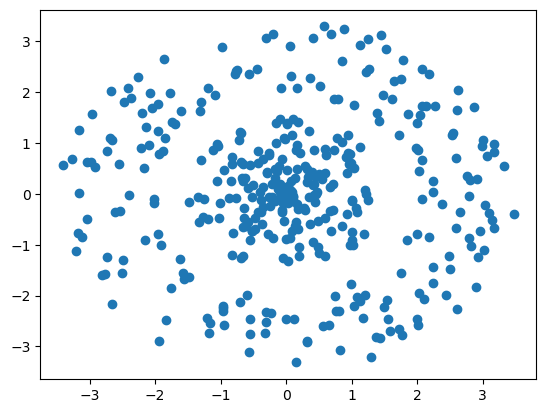

In [1032]:
# Plot the data
plt.scatter(x['X'], x['Y'])

In [1033]:
# Transform the training inputs into a polynomial feature set
poly = PolynomialFeatures(2)
training_inputs = poly.fit_transform(x)
labels = y.values
# Initialize the perceptron with the new input size
perceptron = PerceptronBatch(epochs=100, learning_rate=0.01, weights=np.random.rand(6))
perceptron.train(training_inputs, labels)

Epoch: 0 Accuracy: 0.01694915254237288
Epoch: 1 Accuracy: 0.023255813953488372
Epoch: 2 Accuracy: 0.024691358024691357
Epoch: 3 Accuracy: 0.021052631578947368
Epoch: 4 Accuracy: 0.020202020202020204
Epoch: 5 Accuracy: 0.017699115044247787
Epoch: 6 Accuracy: 0.016
Epoch: 7 Accuracy: 0.015037593984962405
Epoch: 8 Accuracy: 0.014184397163120567
Epoch: 9 Accuracy: 0.013071895424836602
Epoch: 10 Accuracy: 0.013071895424836602
Epoch: 11 Accuracy: 0.012578616352201259
Epoch: 12 Accuracy: 0.012121212121212121
Epoch: 13 Accuracy: 0.011764705882352941
Epoch: 14 Accuracy: 0.011627906976744186
Epoch: 15 Accuracy: 0.011494252873563218
Epoch: 16 Accuracy: 0.011428571428571429
Epoch: 17 Accuracy: 0.0111731843575419
Epoch: 18 Accuracy: 0.011111111111111112
Epoch: 19 Accuracy: 0.01092896174863388
Epoch: 20 Accuracy: 0.010752688172043012
Epoch: 21 Accuracy: 0.010582010582010581
Epoch: 22 Accuracy: 0.010582010582010581
Epoch: 23 Accuracy: 0.010471204188481676
Epoch: 24 Accuracy: 0.010416666666666666
Epoc

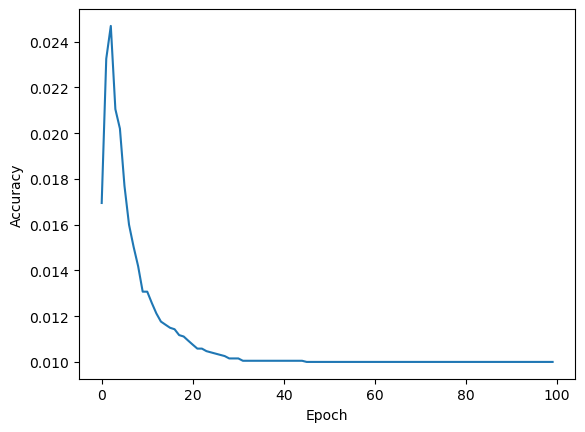

In [1034]:
# Graficar el rendimiento (accuracy) a lo largo de las épocas
plt.plot(perceptron.accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()